In [13]:
# Importing libraries


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2



## Pulling out data and checking all NaN and important features

In [14]:
data = pd.read_csv('/Users/victorhugo/Documents/Work/Kaggle/Loan Payback/playground-series-s5e11/train.csv')
data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [16]:
data.shape

(593994, 13)

In [17]:
data.isna().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [18]:
target_dist = data['loan_paid_back'].value_counts(normalize=True)
print("Target Distribution")
print(target_dist)

# 20 % of people do not payback the loans

Target Distribution
loan_paid_back
1.0    0.79882
0.0    0.20118
Name: proportion, dtype: float64


[]

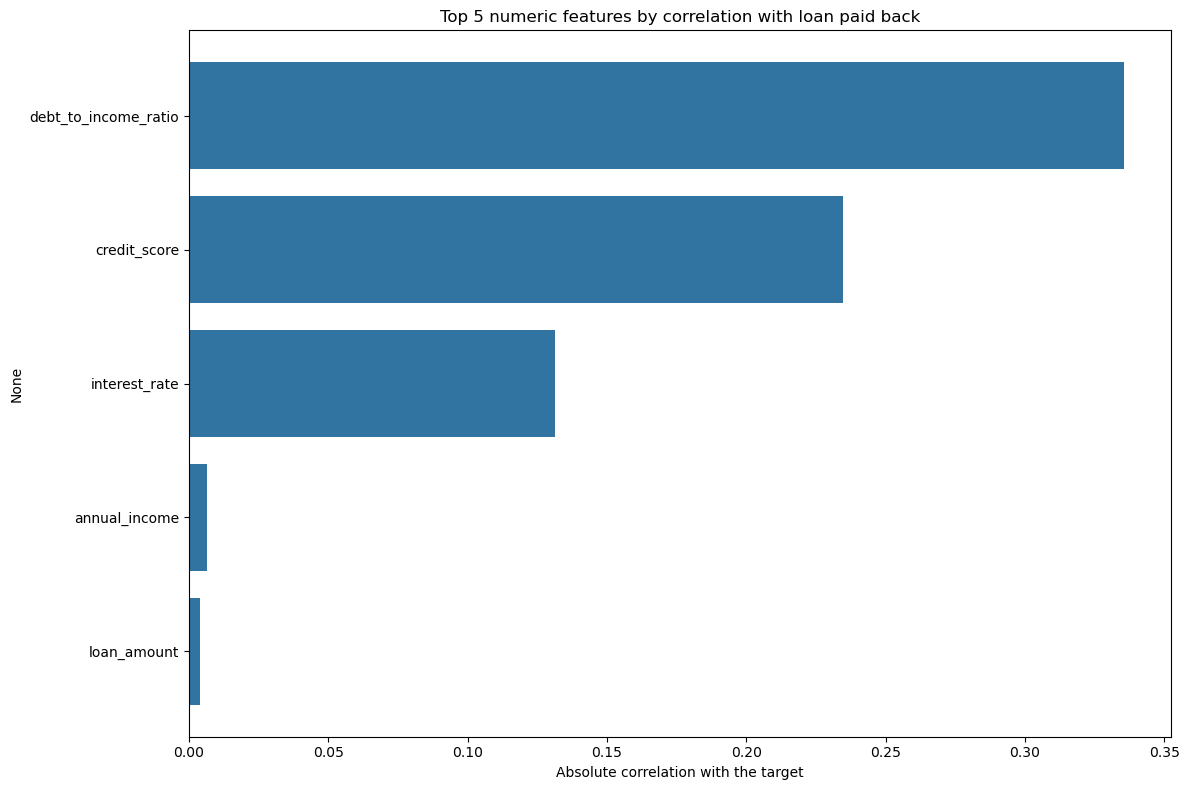

In [19]:
# numeric correlations

num_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']
correlations = data[num_cols + ['loan_paid_back']].corr()['loan_paid_back'].abs().sort_values(ascending=False)


plt.figure(figsize = (12,8))
top_corr = correlations.head(5)

sns.barplot(x=correlations[1:].values, y=correlations.index[1:])
plt.title("Top 5 numeric features by correlation with loan paid back")
plt.xlabel("Absolute correlation with the target")
plt.tight_layout()
plt.plot()

### From this we would probably eliminate annual_income and loan_amout , since these informations should already be given by debt_to_income_ratio

## Time to verify the categorical features and the relation with the target

In [20]:
categories = ['gender','marital_status','education_level','employment_status','loan_purpose','grade_subgrade']
label_encoder = LabelEncoder()

for cat in categories:
    data[cat] = label_encoder.fit_transform(data[cat])


# Chi-Square Test

In [21]:
X_cat = data[categories]
y = data['loan_paid_back']      # Goal

chi2_stats , p_values = chi2(X_cat,y)


for col, chi2_stat , p_val in zip(X_cat.columns, chi2_stats, p_values):
    print(f'{col}: chi2={chi2_stat:.2f}, p-value={p_val:.4f}')
    

gender: chi2=17.19, p-value=0.0000
marital_status: chi2=0.02, p-value=0.8804
education_level: chi2=238.29, p-value=0.0000
employment_status: chi2=527007.18, p-value=0.0000
loan_purpose: chi2=0.59, p-value=0.4418
grade_subgrade: chi2=50193.64, p-value=0.0000


/var/folders/tz/tl_w5k6s62vcg00cl2mjjbtc0000gn/T/ipykernel_98816/2925705374.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = p_values_df, x = 'p-value' , y='Feature', palette = 'viridis')


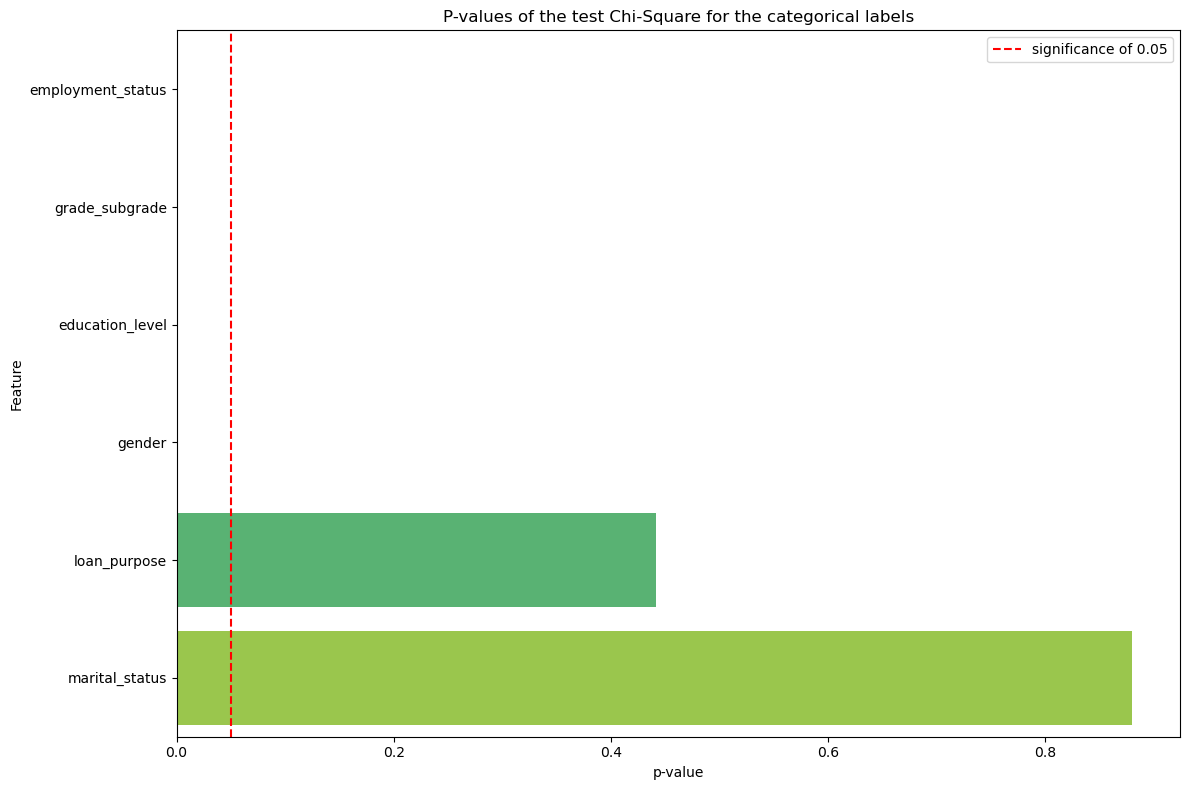

In [22]:
p_values_df = pd.DataFrame({
    'Feature' : X_cat.columns,
    'p-value' : p_values
}).sort_values('p-value')

plt.figure(figsize=(12,8))

sns.barplot(data = p_values_df, x = 'p-value' , y='Feature', palette = 'viridis')
plt.axvline(x=0.05, color = 'red', linestyle = '--' , label = 'significance of 0.05')
plt.title("P-values of the test Chi-Square for the categorical labels")
plt.legend()
plt.tight_layout()
plt.show()

## From this ,we could discard 'loan_purpose' and 'marital_status'